# Example usage

In this example, we'll use kmeanseval to determine a good value for k to cluster movies by budget, revenue, and runtime. This data is a sample of MovieLens movie data downloaded from Kaggle: https://www.kaggle.com/rounakbanik/the-movies-dataset

We'll make the assumption that we want a relatively low value for k (2 to 10 clusters) so that they can be human-interpretable, but we need to decide how many clusters to choose within that range.

## Setup
To start, we read in our data on movies, clean it, and create our KMeansEvaluator object.

In [1]:
import kmeanseval
import pandas as pd
from sklearn.preprocessing import StandardScaler

In [2]:
# load dataset and select the features we want
df = pd.read_csv('./data/movies_metadata_sample.csv', sep=',')
df = df[['budget', 'revenue', 'runtime']]

# Drop nulls
df = df.dropna()

# Scale these features
scaler = StandardScaler()
df = scaler.fit_transform(df)

When instantiating the KMeansEvaluator, we have to pass our data, our k range, and any variables we want to use in the sklearn.

In this case, we want the sklearn models to initialize cluster centers with k-means++, and we want to specify a random state for reproducible results.

In [10]:
# Instantiate the KMeansEvaluator object
kme = kmeanseval.KMeansEvaluator(data = df, k_range = range(2, 11), init = 'k-means++', random_state = 123)

## Calculate metrics

kmeanseval supports 2 metrics for selecting an ideal k in k-means clustering:
* within-cluster-sum of squared errors
* silhouette score

The raw values for these metrics can be obtained with the 'get_metrics()' function, which takes a single argument 'metric' which can take 3 values:
* 'wss' to get within-cluster-sum of squared errors for each cluster
* 'silhouette_score_avg' to get the average silhouette score for each cluster
* 'silhouette_score_sample' to get the silhouette score for each sample/observation

In [4]:
# get within-cluster-sum of squared errors
wss = kme.get_metrics(metric = 'wss')

# get average silhouette scores
sscore = kme.get_metrics(metric = 'silhouette_score_avg')

# get sample silhouette scores
ssample = kme.get_metrics(metric = 'silhouette_score_sample')

In [5]:
# observe our WSS values
wss

[8498.13409721234,
 6683.828335598631,
 4997.705708166037,
 3872.650729123641,
 3143.9147921248546,
 2584.6055324878907,
 2289.4980877837097,
 2012.1055790077746,
 1783.6047436949764]

If an invalid value (or no value) for a metric is passed to get_metrics, the function defaults to providing WSS values and informs the user of this behavior.

In [6]:
# test default behavior
default = kme.get_metrics(metric = 'oops')
default

invalid metric supplied: 'oops', defaulting to 'wss'


[8498.13409721234,
 6683.828335598631,
 4997.705708166037,
 3872.650729123641,
 3143.9147921248546,
 2584.6055324878907,
 2289.4980877837097,
 2012.1055790077746,
 1783.6047436949764]

## Plot metric values

kmeanseval supports 3 types of plots through 3 separate functions:
* plot_elbow(): Creates the traditional "elbow" plot for WSS
* plot_avg_silhouette_scores(): Creates a line plot of average silhouette scores for each cluster
* plot_sample_silhouette_scores(): Creates a plot of all sample silhouette scores grouped by cluster

Each of these functions can take a 'figsize' arguments and 'textsize' argument to determine the size of the chart and its text.

In this example, we'll use all 3 plots to make a decision for k.

### Elbow plot
The elbow plot in this example doesn't show any compelling breakpoints for k, but we do see diminishing returns for k starting in the 6-8 cluster range.

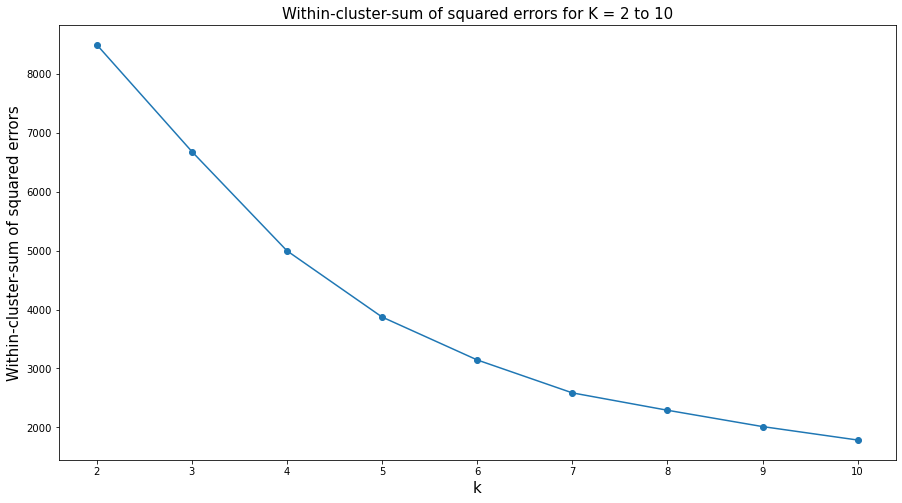

In [7]:
# We start with the WSS elbow plot
kme.plot_elbow(figsize = (15, 8), textsize = 15)

### Average silhouette score plot
Average silhouette scores have local maxima at 5 and 8 clusters, which makes 8 a more compelling choice than 6 or 7 when compared to the elbow plot

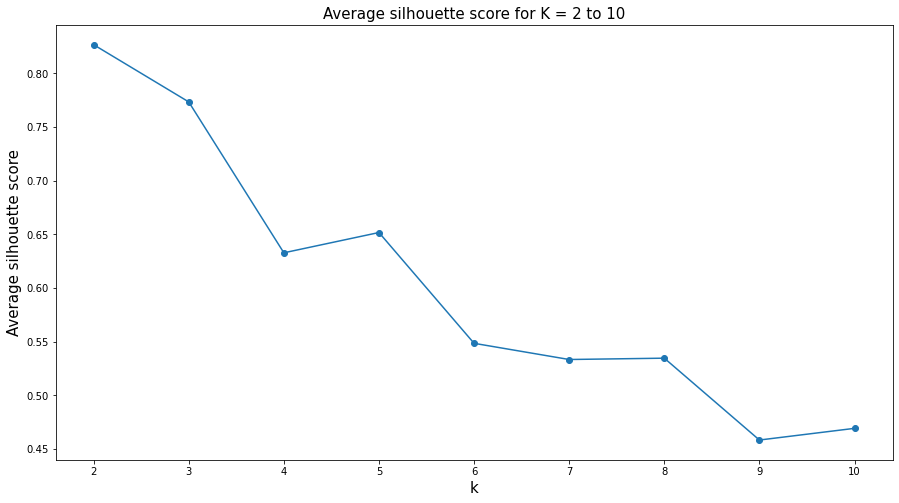

In [8]:
# Next we plot the average silhouette score
kme.plot_avg_silhouette_scores(figsize = (15, 8), textsize = 15)

### Sample silhouette score plot
Finally we observe the plot of silhouette scores for all of our datapoints and observe 2 important findings:
* 7 or 8 clusters look much better than 6, since have 6 clusters leads to a cluster with lots of negative silhouette scores (i.e. wrongly clustered data)
* However, even at 7 or 8 clusters we have many clusters that are all below the average silhouette score (dotted red line), and we still see a handful of negative silhouette scores, leading us to believe that this data probably doesn't cluster well in general

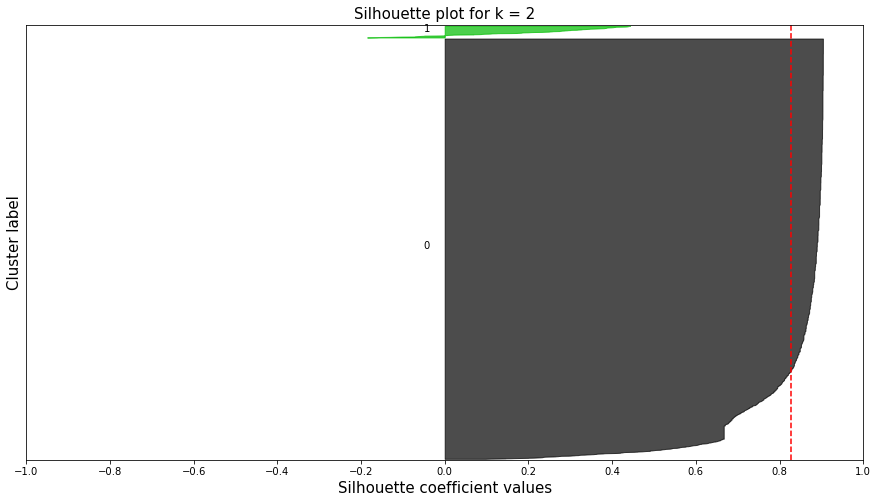

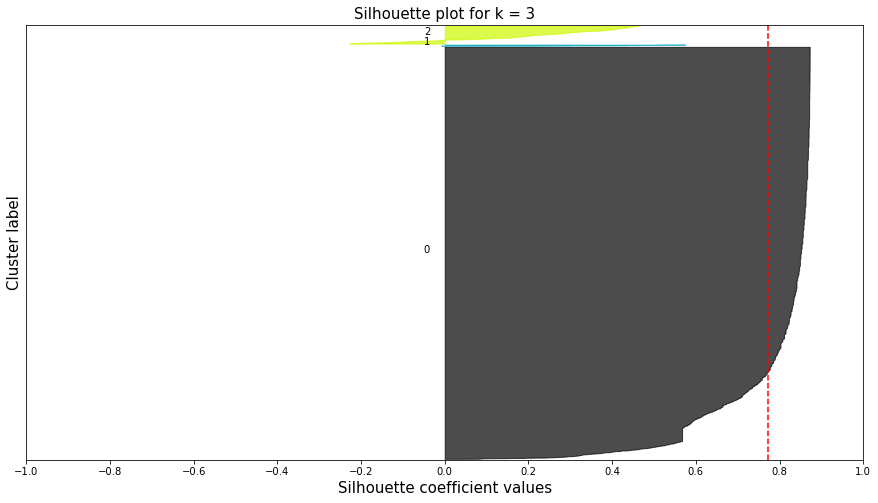

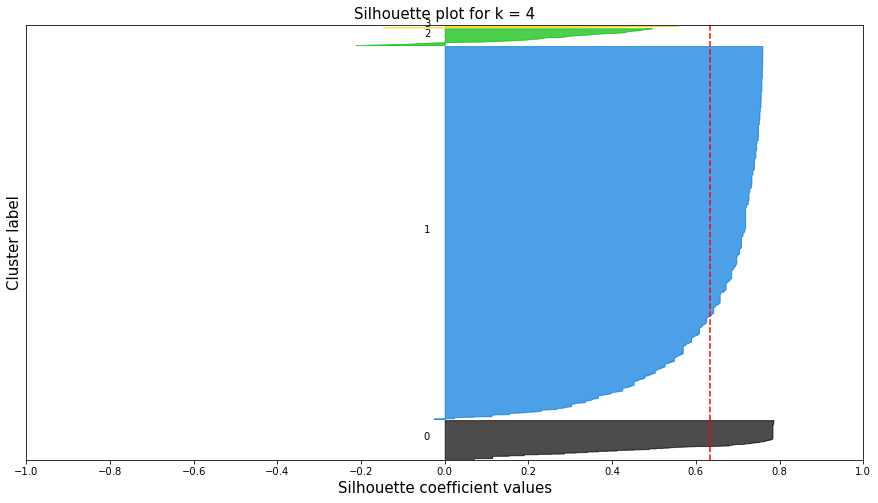

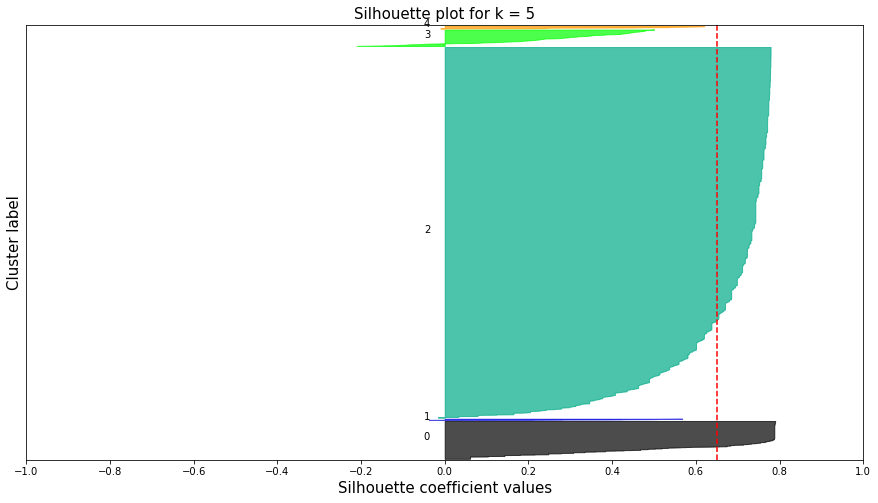

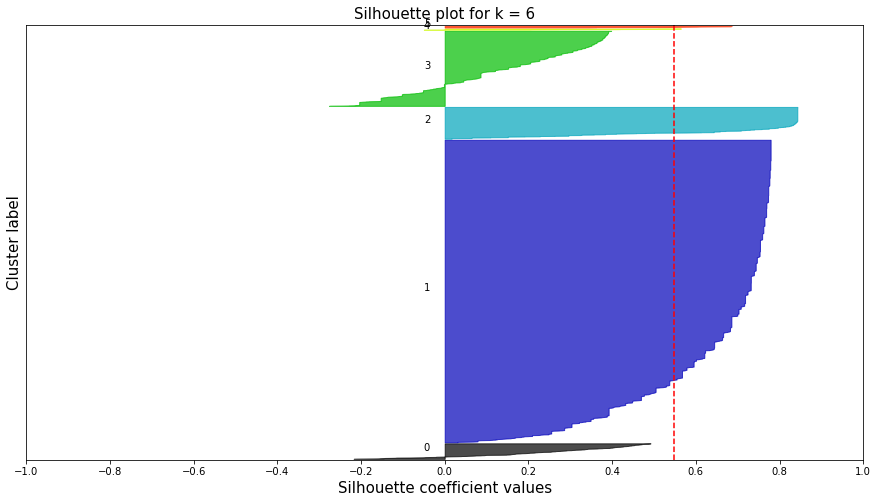

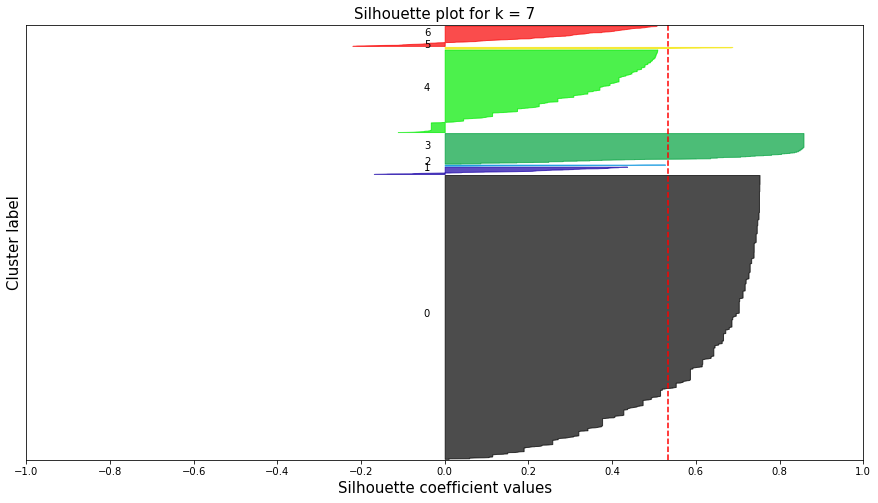

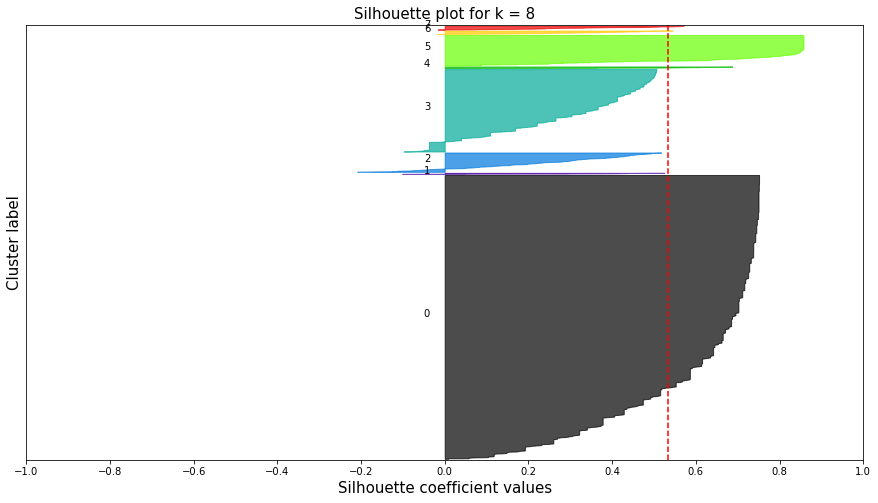

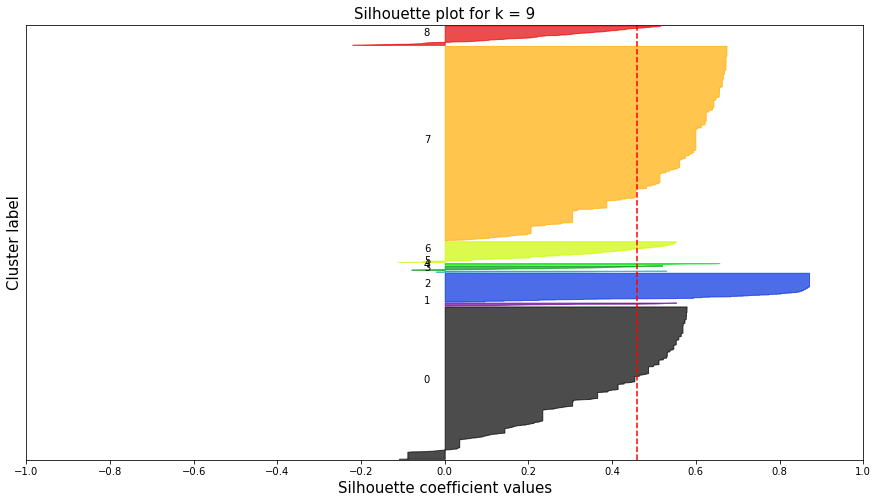

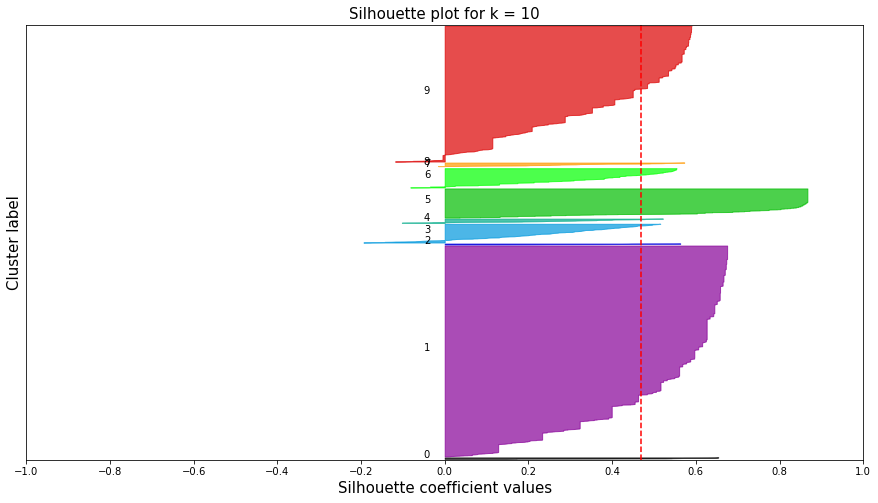

In [9]:
# Finally we plot the full set of sample silhouette scores compared to the average
kme.plot_silhouette_scores(figsize = (15, 8), textsize = 15)

## Conclusion

By using kmeanseval, we were able to make the conclusion that choosing k = 8 seems good for the range we're looking at, but we can also conclude that the data we're using actually doesn't have a good structure for clustering (at least not in the 2 to 10 cluster range). This was done with much less boilerplate code than if we had done this from scratch!